# Project Description.

<b>Problem Statement :</b>
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service.

<b>Objective :</b>
* We are required to model the data relating to the various customer attributes and their response towards the marketting campaigns, and report the key-drivers of those responses.
* The predictive model will be used to predict the response of a new customer towards a marketting campaign, in order to do targetted marketting which would lead to a better response-ratio for the compaigns and hence will cut down unnecessary costs.

<b>Data source :</b>

* Kaggle : https://www.kaggle.com/rodsaldanha/arketing-campaign

# Importing libraries
Okay so prima facie, lets import some of the libraries we will be needing for this project.
(even if we are missing out on some library, we can always import it later on in the project.)

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and manupulation
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 1000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Loading the data.

In [3]:
data = pd.read_csv('marketing_campaign.csv')
print('The dimension of our data is :',data.shape)

The dimension of our data is : (2240, 29)


In [4]:
# let's have a look at the features and the corresponding data types of those features\n",
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory data analysis.
## And data cleaning if required.

### Feature : ' ID '

In [6]:
data['ID'].value_counts().index.sort_values(ascending=True)

Int64Index([    0,     1,     9,    13,    17,    20,    22,    24,    25,
               35,
            ...
            11133, 11148, 11166, 11171, 11176, 11178, 11181, 11187, 11188,
            11191],
           dtype='int64', length=2240)

Okay so we can see that the feature ID represents the customer IDs of the various customers over a period of time, but the data does not reflect a consecutive collection of data from all the customers, which is why the length of our data is no inline with the range of the customer IDs in this feature.  
Due to the fact mentoined above, the feature is distorting the data a bit, so we will be dropping the feature from our data as it is not adding any value to our data and hence not required for our analysis.

In [7]:
data.drop('ID', axis=1, inplace=True)

### Feature : ' Year_Birth '

In [8]:
data['Year_Birth'].value_counts().index.sort_values(ascending=True)

Int64Index([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
            1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996],
           dtype='int64')

Okay so from above we can observe the the feature 'Year_Birth' represents the different years of birth of the customers. The data collected contains some gaps in this feature; in terms of particular years in which customers were born. So our data does not contain all the years starting from 1893 to 1996.

### Feature : ' Education '

In [9]:
data['Education'].value_counts().index.sort_values(ascending=True)

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

We can see that there are  classes in this feature, but there are 2 among them which mean the same but are represented in two different ways; i.e. '2n Cycle' and 'Master'. So we will replace all occurances of he class'2n Cycle' with 'Master', for a better value representation.

In [10]:
data['Education'] = data["Education"].replace('2n Cycle', "Master")

### Feature : ' Marital_Status '

In [11]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

okay so this feature has 8 classes inour data, for the purpose of a better value representation in this feature, we will be doing the following transformations to some of the classes :
* 'Together' > replaced by 'live_in',
* 'Alone', 'YOLO' and 'Absurd' > replaced by 'single' .

In [12]:
data['Marital_Status'] = data['Marital_Status'].replace('Together', 'Live_in')
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

### Feature : ' Dt_Customer '

In [14]:
data['Dt_Customer'].value_counts().index.sort_values(ascending=True)

Index(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03',
       '2012-08-04', '2012-08-05', '2012-08-06', '2012-08-07', '2012-08-08',
       ...
       '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
       '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29'],
      dtype='object', length=663)

The feature Dt_Customer represents dates of customer’s enrolment with the company. The data in this feature is represented in type str. In order to improve the value representation of this feture, and to do meaningful feature engineering with this feature, we will be converting the values in this feaure to data type datetime.

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%Y-%m-%d")

In [16]:
data['Dt_Customer'].value_counts().index.sort_values(ascending=True)

DatetimeIndex(['2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02',
               '2012-08-03', '2012-08-04', '2012-08-05', '2012-08-06',
               '2012-08-07', '2012-08-08',
               ...
               '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-28', '2014-06-29'],
              dtype='datetime64[ns]', length=663, freq=None)

As we can see that the data type has been converted into datetime64[ns], without effecting the data itself.

# Descriptive analysis.

In [17]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


As we can see from above the numerical features are on very different scales with respect to each other, this tells us that we will need to scale the numerical features in the future before using for modelling the data.

In [18]:
data.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,NaN,NaN,0.117372


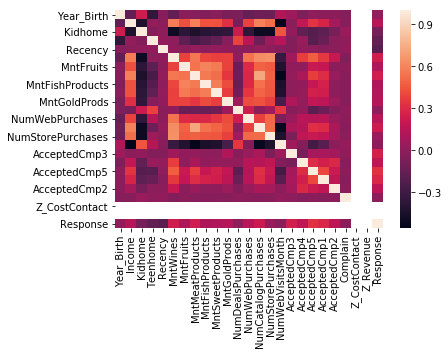

In [19]:
# Visualization of the correlation between the features.
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

# Handling missing-values.

# Outliers detection and removal.

# Exploratory data analysis utilising visualizations.

# Feature engineering.

# Splitting the data for testing.

# Feature Scalling.

# Hyper-parameter optimization of models.

# Model validation.

# Final prediction.

# Saving the best model.